<a href="https://colab.research.google.com/github/zhgjenny93/Capstones/blob/Travel-Reviews-Unsupervised-Learning-Capstone/Travel_Reviews_Interest_Groups_Capstone_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.decomposition import PCA
from scipy.spatial.distance import cdist
sns.set()

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/zhgjenny93/datasets/main/google_review_ratings.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5456 entries, 0 to 5455
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   User         5456 non-null   object 
 1   Category 1   5456 non-null   float64
 2   Category 2   5456 non-null   float64
 3   Category 3   5456 non-null   float64
 4   Category 4   5456 non-null   float64
 5   Category 5   5456 non-null   float64
 6   Category 6   5456 non-null   float64
 7   Category 7   5456 non-null   float64
 8   Category 8   5456 non-null   float64
 9   Category 9   5456 non-null   float64
 10  Category 10  5456 non-null   float64
 11  Category 11  5456 non-null   object 
 12  Category 12  5455 non-null   float64
 13  Category 13  5456 non-null   float64
 14  Category 14  5456 non-null   float64
 15  Category 15  5456 non-null   float64
 16  Category 16  5456 non-null   float64
 17  Category 17  5456 non-null   float64
 18  Category 18  5456 non-null   float64
 19  Catego

In [ ]:
# There should not be an unnamed column at the end of the dataframe, remove that column
df.drop(columns=df.columns[-1], axis=1, inplace=True)

In [ ]:
df.columns = ['User', 'Churches', 'Resorts', 'Beaches', 'Parks', 'Theatres', 'Museums', 'Malls', 'Zoo', 'Restaurants', 'Pubs/Bars', 'Local Services', 'Burger/Pizza Shops', 'Hotels/Other Lodgings', 'Juice Bars', 'Art Galleries', 'Dance Clubs',
              'Swimming Pools', 'Gyms', 'Bakeries', 'Beauty & Spas', 'Cafes', 'View Points', 'Monuments', 'Gardens']

In [ ]:
df.head()

,User,Churches,Resorts,Beaches,Parks,Theatres,Museums,Malls,Zoo,Restaurants,Pubs/Bars,Local Services,Burger/Pizza Shops,Hotels/Other Lodgings,Juice Bars,Art Galleries,Dance Clubs,Swimming Pools,Gyms,Bakeries,Beauty & Spas,Cafes,View Points,Monuments,Gardens
0,User 1,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.35,2.33,2.64,1.7,1.69,1.7,1.72,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
1,User 2,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.64,2.33,2.65,1.7,1.69,1.7,1.72,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
2,User 3,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,2.64,1.7,1.69,1.7,1.72,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
3,User 4,0.0,0.5,3.63,3.63,5.0,2.92,5.0,2.35,2.33,2.64,1.73,1.69,1.7,1.72,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
4,User 5,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,2.64,1.7,1.69,1.7,1.72,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Perform Data Cleaning and Data Exploration
df.set_index('User', inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5456 entries, User 1 to User 5456
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Churches               5456 non-null   float64
 1   Resorts                5456 non-null   float64
 2   Beaches                5456 non-null   float64
 3   Parks                  5456 non-null   float64
 4   Theatres               5456 non-null   float64
 5   Museums                5456 non-null   float64
 6   Malls                  5456 non-null   float64
 7   Zoo                    5456 non-null   float64
 8   Restaurants            5456 non-null   float64
 9   Pubs/Bars              5456 non-null   float64
 10  Local Services         5456 non-null   object 
 11  Burger/Pizza Shops     5455 non-null   float64
 12  Hotels/Other Lodgings  5456 non-null   float64
 13  Juice Bars             5456 non-null   float64
 14  Art Galleries          5456 non-null   float64
 15 

In [ ]:
df['Local Services'] = pd.to_numeric(df['Local Services'], errors='coerce')

In [ ]:
df.isnull().sum()

Churches                 0
Resorts                  0
Beaches                  0
Parks                    0
Theatres                 0
Museums                  0
Malls                    0
Zoo                      0
Restaurants              0
Pubs/Bars                0
Local Services           1
Burger/Pizza Shops       1
Hotels/Other Lodgings    0
Juice Bars               0
Art Galleries            0
Dance Clubs              0
Swimming Pools           0
Gyms                     0
Bakeries                 0
Beauty & Spas            0
Cafes                    0
View Points              0
Monuments                0
Gardens                  1
dtype: int64

In [ ]:
df.fillna(df.mean(), inplace=True)

In [ ]:
df.isnull().sum()

Churches                 0
Resorts                  0
Beaches                  0
Parks                    0
Theatres                 0
Museums                  0
Malls                    0
Zoo                      0
Restaurants              0
Pubs/Bars                0
Local Services           0
Burger/Pizza Shops       0
Hotels/Other Lodgings    0
Juice Bars               0
Art Galleries            0
Dance Clubs              0
Swimming Pools           0
Gyms                     0
Bakeries                 0
Beauty & Spas            0
Cafes                    0
View Points              0
Monuments                0
Gardens                  0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5456 entries, User 1 to User 5456
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Churches               5456 non-null   float64
 1   Resorts                5456 non-null   float64
 2   Beaches                5456 non-null   float64
 3   Parks                  5456 non-null   float64
 4   Theatres               5456 non-null   float64
 5   Museums                5456 non-null   float64
 6   Malls                  5456 non-null   float64
 7   Zoo                    5456 non-null   float64
 8   Restaurants            5456 non-null   float64
 9   Pubs/Bars              5456 non-null   float64
 10  Local Services         5456 non-null   float64
 11  Burger/Pizza Shops     5456 non-null   float64
 12  Hotels/Other Lodgings  5456 non-null   float64
 13  Juice Bars             5456 non-null   float64
 14  Art Galleries          5456 non-null   float64
 15 

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5456 entries, User 1 to User 5456
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Churches               5456 non-null   float64
 1   Resorts                5456 non-null   float64
 2   Beaches                5456 non-null   float64
 3   Parks                  5456 non-null   float64
 4   Theatres               5456 non-null   float64
 5   Museums                5456 non-null   float64
 6   Malls                  5456 non-null   float64
 7   Zoo                    5456 non-null   float64
 8   Restaurants            5456 non-null   float64
 9   Pubs/Bars              5456 non-null   float64
 10  Local Services         5456 non-null   float64
 11  Burger/Pizza Shops     5456 non-null   float64
 12  Hotels/Other Lodgings  5456 non-null   float64
 13  Juice Bars             5456 non-null   float64
 14  Art Galleries          5456 non-null   float64
 15 

In [ ]:
# Let's look at the stats of each category
df.describe()

,Churches,Resorts,Beaches,Parks,Theatres,Museums,Malls,Zoo,Restaurants,Pubs/Bars,Local Services,Burger/Pizza Shops,Hotels/Other Lodgings,Juice Bars,Art Galleries,Dance Clubs,Swimming Pools,Gyms,Bakeries,Beauty & Spas,Cafes,View Points,Monuments,Gardens
count,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.00000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000
mean,1.455720,2.319707,2.489331,2.796886,2.958941,2.89349,3.351395,2.540795,3.126019,2.832729,2.550071,2.078339,2.125511,2.190861,2.206573,1.192801,0.949203,0.822414,0.969811,1.000071,0.965838,1.750537,1.531453,1.560755
std,0.827604,1.421438,1.247815,1.309159,1.339056,1.28240,1.413492,1.111391,1.356802,1.307665,1.381643,1.249094,1.406542,1.576686,1.715961,1.107005,0.973536,0.947911,1.203972,1.193891,0.929853,1.598734,1.316889,1.171649
min,0.000000,0.000000,0.000000,0.830000,1.120000,1.11000,1.120000,0.860000,0.840000,0.810000,0.780000,0.780000,0.770000,0.760000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.920000,1.360000,1.540000,1.730000,1.770000,1.79000,1.930000,1.620000,1.800000,1.640000,1.580000,1.290000,1.190000,1.030000,0.860000,0.690000,0.580000,0.530000,0.520000,0.540000,0.570000,0.740000,0.790000,0.880000
50%,1.340000,1.905000,2.060000,2.460000,2.670000,2.68000,3.230000,2.170000,2.800000,2.680000,2.000000,1.690000,1.610000,1.490000,1.330000,0.800000,0.740000,0.690000,0.690000,0.690000,0.760000,1.030000,1.070000,1.290000
75%,1.810000,2.682500,2.740000,4.092500,4.312500,3.84000,5.000000,3.190000,5.000000,3.530000,3.220000,2.282500,2.360000,2.740000,4.440000,1.160000,0.910000,0.840000,0.860000,0.860000,1.000000,2.070000,1.560000,1.660000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


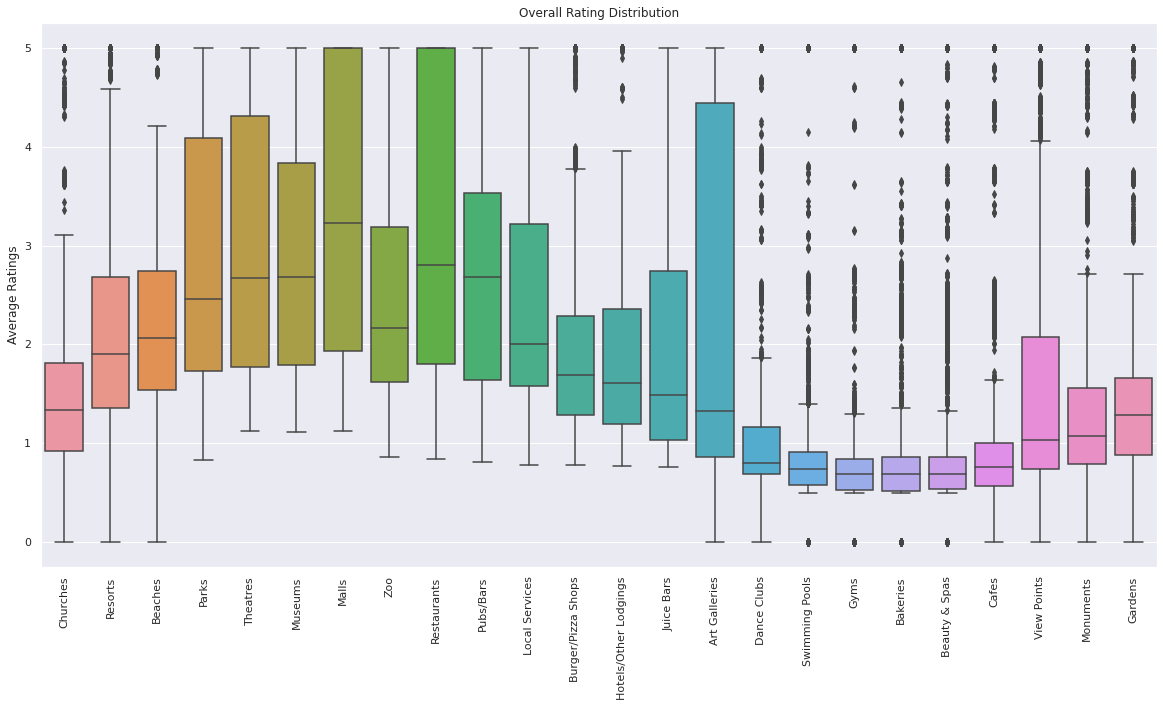

In [ ]:
# Transform the above information into a visual understanding using boxplots
plt.figure(figsize=(20, 10))
g=sns.boxplot(data=df)
g.set_title('Overall Rating Distribution')
g.set_xticklabels(labels=df.columns, rotation=90)
g.set_ylabel('Average Ratings')
plt.show()

In [ ]:
# Since all the variables are within a range of 0-5, I will perform K-means clustering both with StandardScaler and without StandardScaler
# Create a copy of the data for clustering
X = df.copy()

In [ ]:
# Create scaled data
X_scaled = StandardScaler().fit_transform(df)

# PCA without scaling
pca = PCA(2)
X_pca = pca.fit_transform(X)

# PCA with scaling
X_pca_scaled = pca.fit_transform(X_scaled)

In [ ]:
# Run elbow method for optimal value of k in Kmeans
distortions_list = []
inertia_list = []

X_list = [X, X_scaled, X_pca, X_pca_scaled]
K = range(1,24)
for i in range(len(X_list)):
  inertias = []
  distortions = []
  for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(X_list[i])
    kmeanModel.fit(X_list[i])

    distortions.append(sum(np.min(cdist(X_list[i], kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X_list[i].shape[0])

    inertias.append(kmeanModel.inertia_)
  inertia_list.append(inertias)
  distortions_list.append(distortions)

In [ ]:
result1_X = pd.DataFrame({'K': K, 'Inertia': inertia_list[0], 'data_type': 'original'})
result2_X = pd.DataFrame({'K': K, 'Distortion': distortions_list[0], 'data_type':'original'})
result1_X_scaled = pd.DataFrame({'K': K, 'Inertia':inertia_list[1], 'data_type':'og_scaled'})
result2_X_scaled = pd.DataFrame({'K': K, 'Distortion': distortions_list[1], 'data_type':'og_scaled'})
result1_X_pca = pd.DataFrame({'K': K, 'Inertia':inertia_list[2], 'data_type':'og_pca'})
result2_X_pca = pd.DataFrame({'K': K, 'Distortion': distortions_list[2], 'data_type':'og_pca'})
result1_X_pca_scaled = pd.DataFrame({'K': K, 'Inertia':inertia_list[3], 'data_type':'scaled_pca'})
result2_X_pca_scaled = pd.DataFrame({'K': K, 'Distortion': distortions_list[3], 'data_type':'scaled_pca'})

result_inertia = result1_X.append(result1_X_scaled).append(result1_X_pca).append(result1_X_pca_scaled)
result_distortion = result2_X.append(result2_X_scaled).append(result2_X_pca).append(result2_X_pca_scaled)

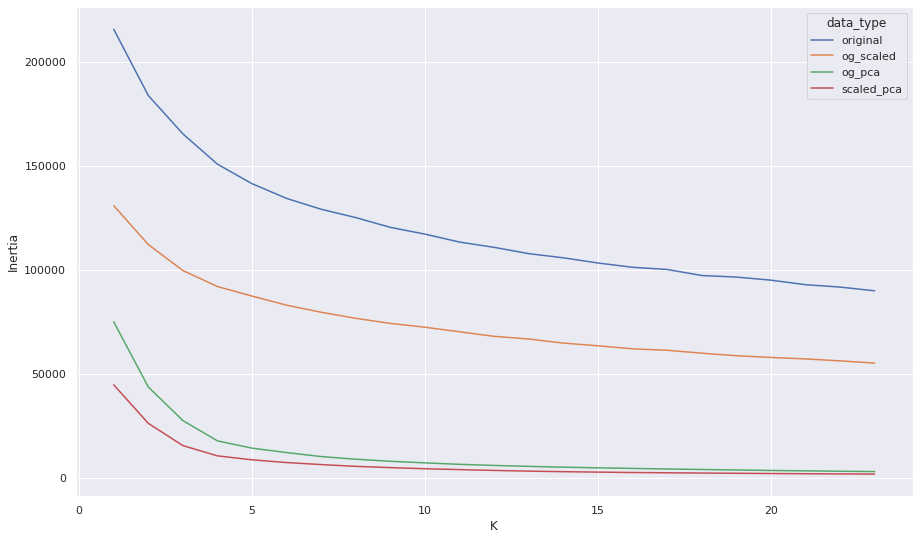

In [ ]:
# Visualizing the results
fig = plt.figure(figsize=(15,9))
g = sns.lineplot(data=result_inertia, x='K', y='Inertia', hue='data_type')

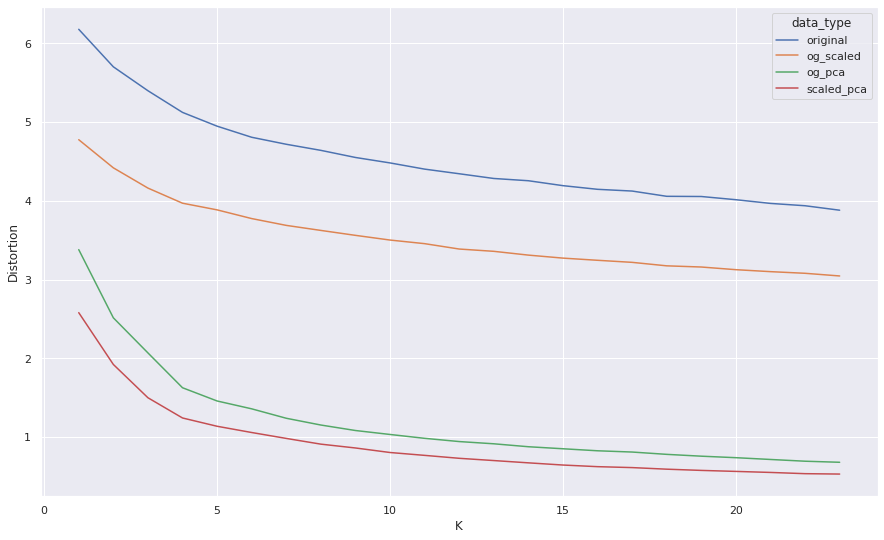

In [ ]:
# Visualizing the results
fig = plt.figure(figsize=(15,9))
g = sns.lineplot(data=result_distortion, x='K', y='Distortion', hue='data_type')

In [ ]:
# From the plot, PCA with scaled data has the lowest inertia, therefore I will build the KMeans model with
#  scaled PCA data, where n_components=2 and 3
# I will build both a model for n_cluster=4 and n_cluster=5


# PCA - can also use the explained_variance_ratio (plot with n_components) to find the best number of clusters
# The plot will look similar to the elbow method above.

In [ ]:
pca = PCA(2)
X_pca_scaled = pca.fit_transform(X_scaled)

### 4-CLUSTER KMEANS

In [ ]:
k_model = KMeans(n_clusters=4)
k_model.fit(X_pca_scaled)

cluster = k_model.labels_

In [ ]:
# print(pca.components_)
# print(pca.components_.shape)

In [ ]:
feature_labels = pd.concat([pd.Series(df.columns), pd.DataFrame(np.transpose(pca.components_), columns=['x','y'])], axis=1)
# feature_labels

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


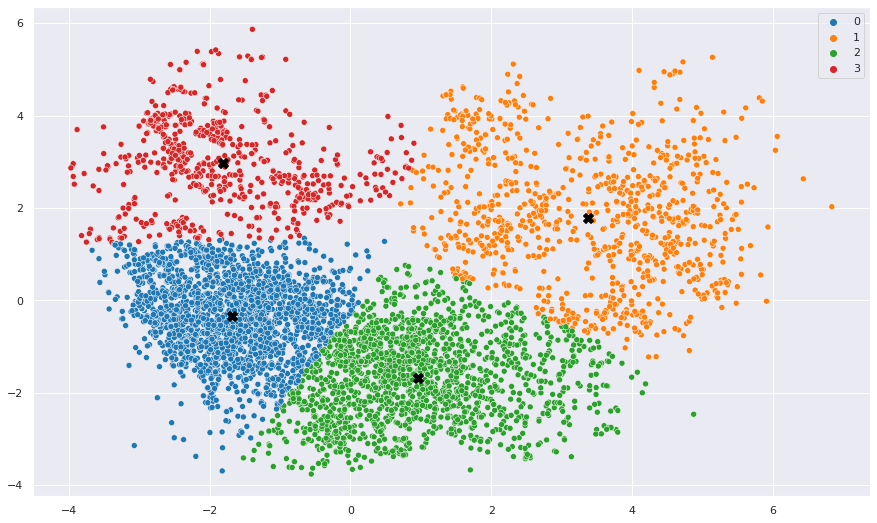

In [ ]:
xs_pca = X_pca_scaled[:,0]
ys_pca = X_pca_scaled[:,1]

plt.figure(figsize=(15,9))
g=sns.scatterplot(xs_pca, ys_pca, hue=cluster, palette='tab10')
plt.scatter(x=k_model.cluster_centers_[:,0], y=k_model.cluster_centers_[:,1], color='black',s=100,marker='X')


In [ ]:
cluster = pd.DataFrame(cluster, columns=['cluster'], index=df.index)

In [ ]:
k4_df = pd.concat([df, cluster], axis=1)

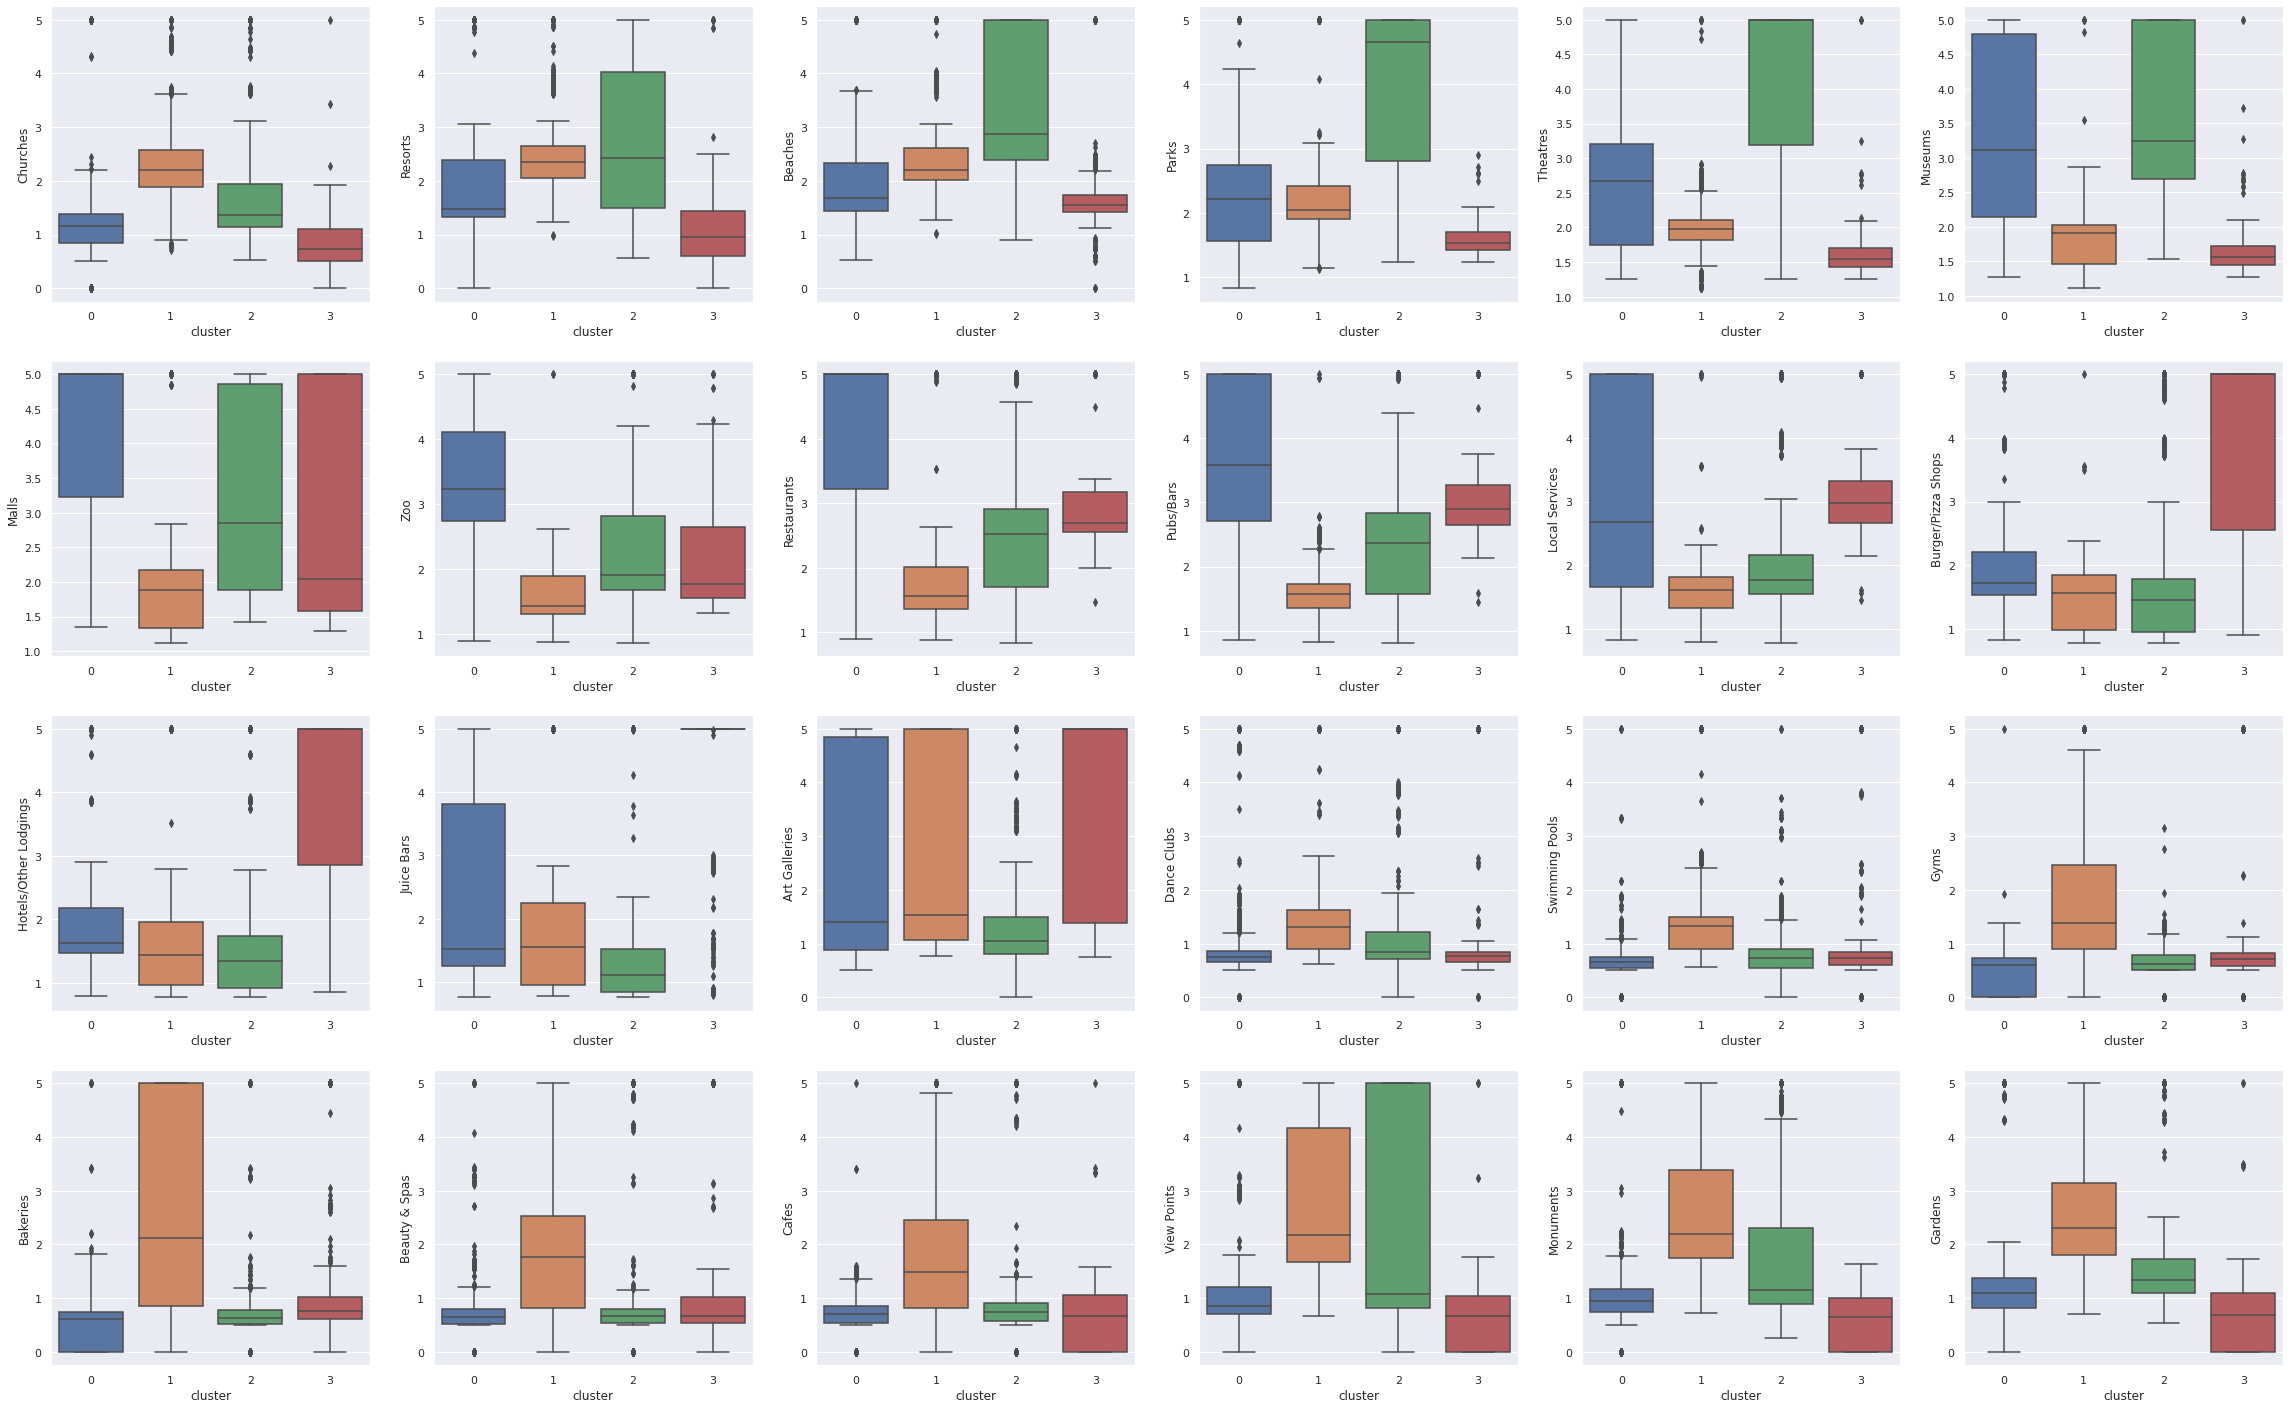

In [ ]:
plt.figure(figsize=(40,25))

for i in range(df.shape[1]):
  # print(i)
  plt.subplot(4,6,i+1)
  g=sns.boxplot(x='cluster', y=k4_df.iloc[:,i], data=k4_df)
 
 
plt.show()

### 5-CLUSTER KMEANS

In [ ]:
k_model = KMeans(n_clusters=5)
k_model.fit(X_pca_scaled)

cluster = k_model.labels_

In [ ]:
feature_labels = pd.concat([pd.Series(df.columns), pd.DataFrame(np.transpose(pca.components_), columns=['x','y'])], axis=1)
# feature_labels

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


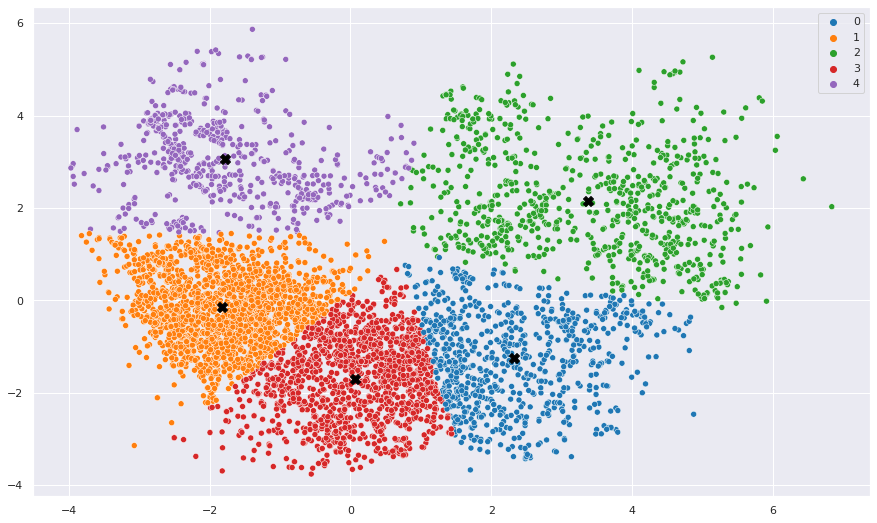

In [ ]:
xs_pca = X_pca_scaled[:,0]
ys_pca = X_pca_scaled[:,1]

plt.figure(figsize=(15,9))
g=sns.scatterplot(xs_pca, ys_pca, hue=cluster, palette='tab10')
plt.scatter(x=k_model.cluster_centers_[:,0], y=k_model.cluster_centers_[:,1], color='black',s=100,marker='X')


In [ ]:
cluster = pd.DataFrame(cluster, columns=['cluster'], index=df.index)

In [ ]:
k5_df = pd.concat([df, cluster], axis=1)

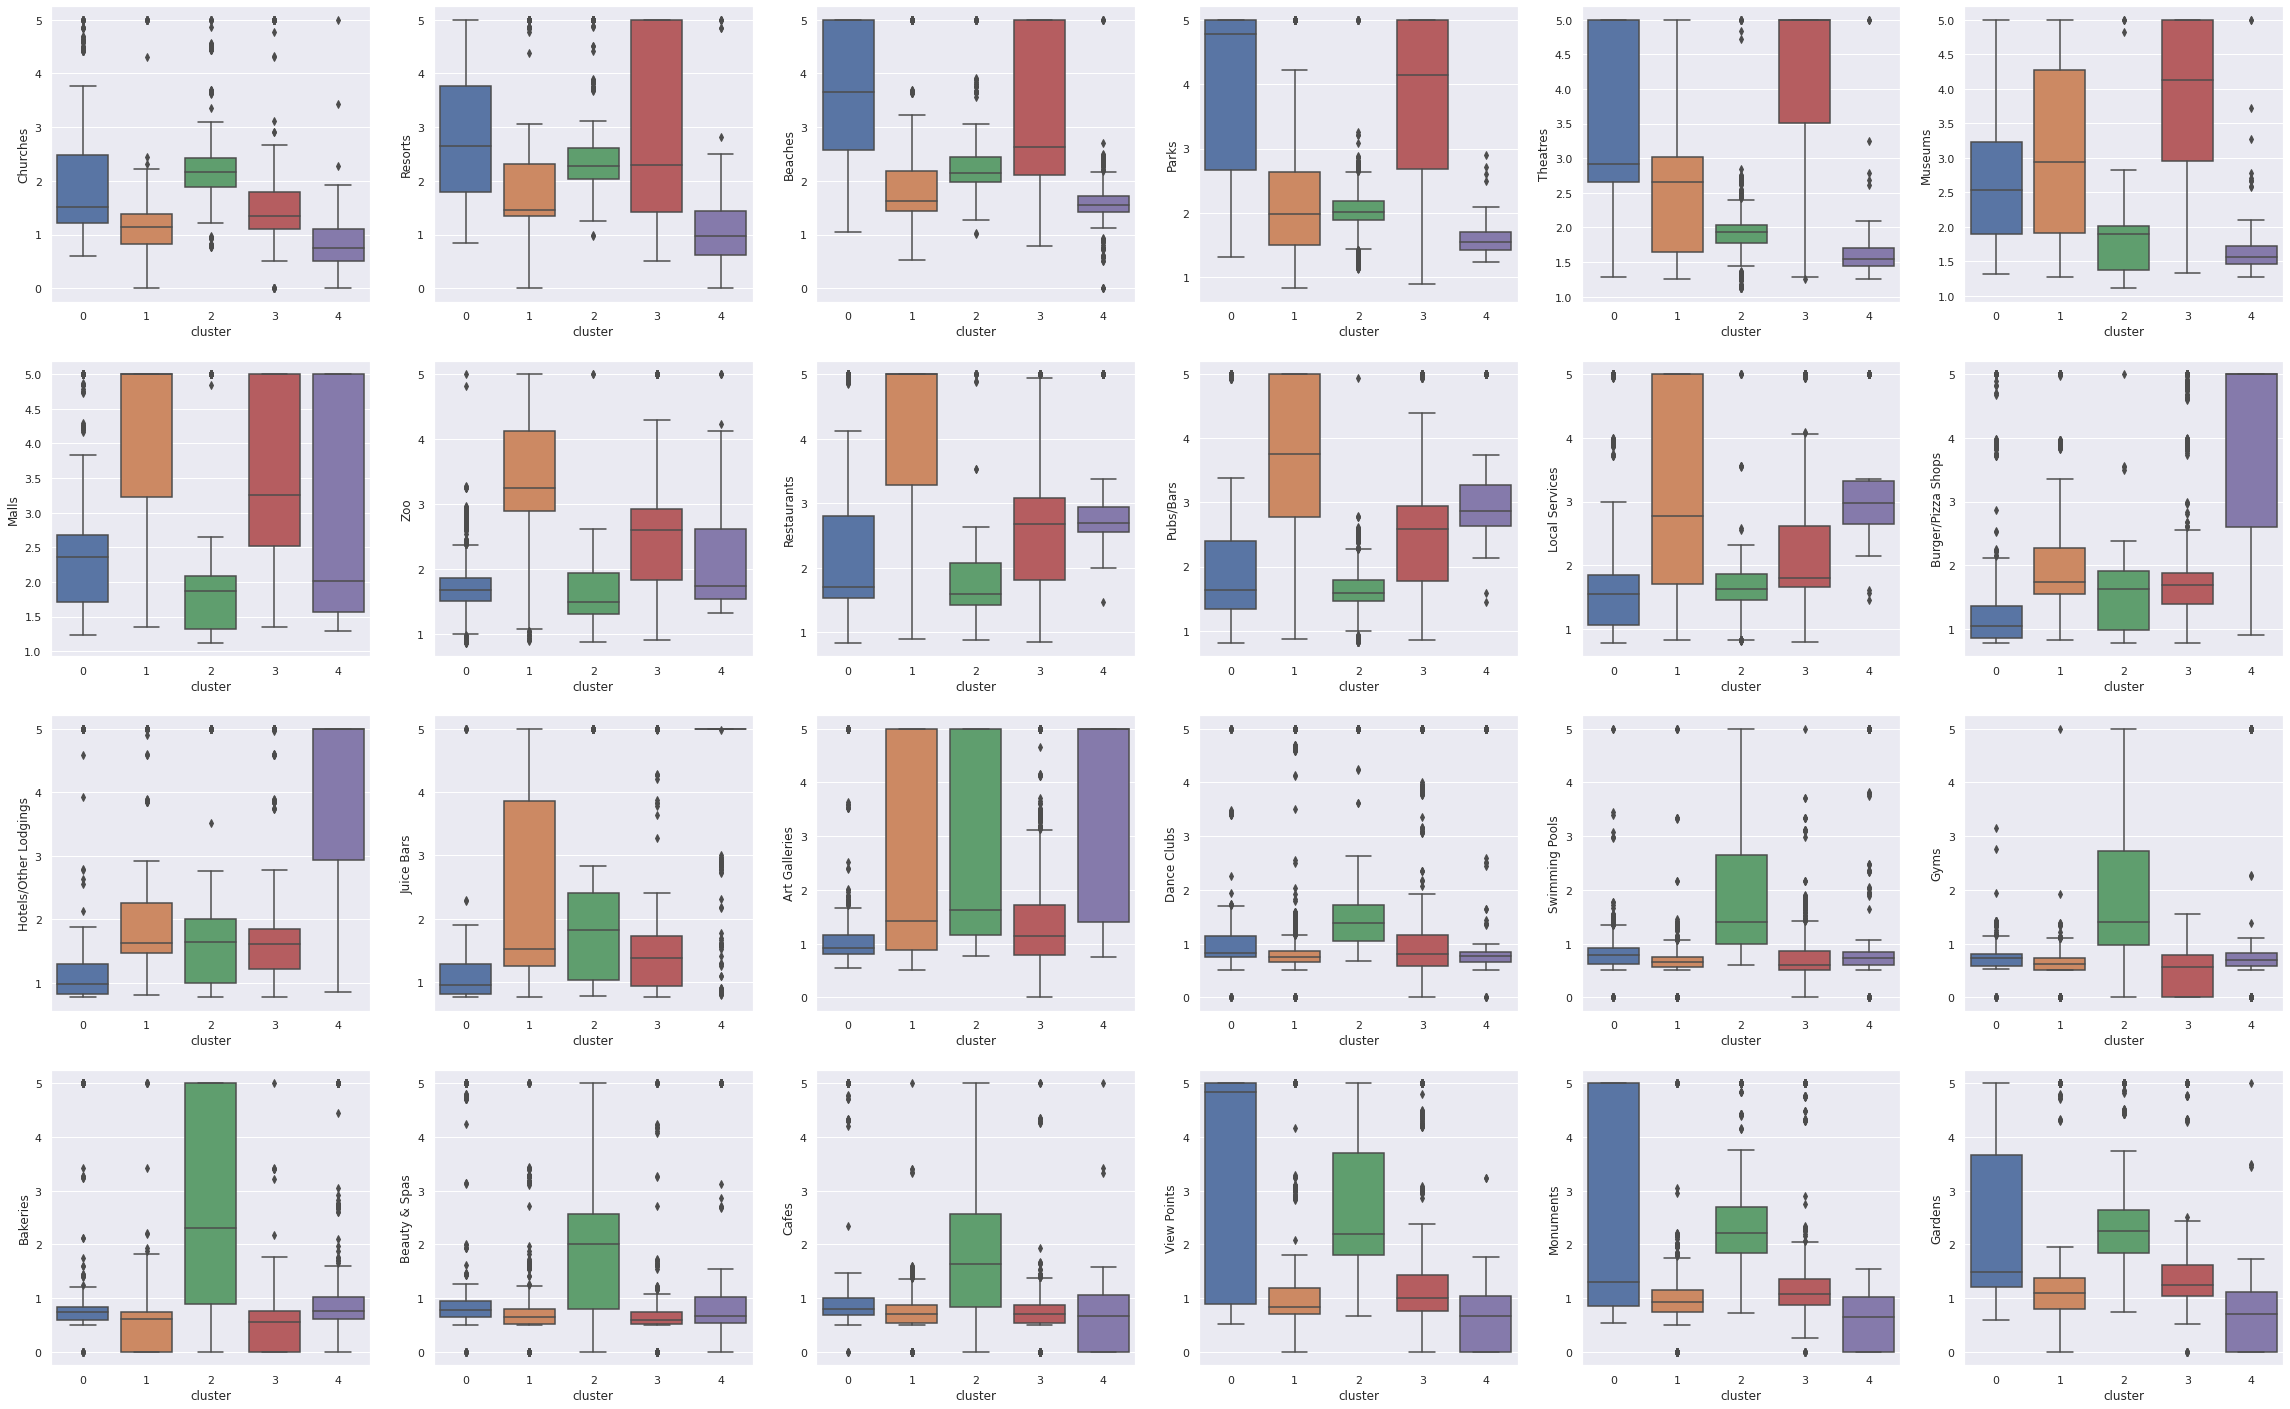

In [ ]:
plt.figure(figsize=(40,25))

for i in range(df.shape[1]):
  # print(i)
  plt.subplot(4,6,i+1)
  g=sns.boxplot(x='cluster', y=k5_df.iloc[:,i], data=k5_df)
 
 
plt.show()